<a href="https://colab.research.google.com/github/joshIsac/DeepLearningLab/blob/main/2348523_dl_lab4_Deep_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn


In [101]:
tel_data =pd.read_csv("/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv")
tel_data.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [102]:
tel_data.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [103]:
#checking for missing values
tel_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [104]:
tel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [105]:
tel_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


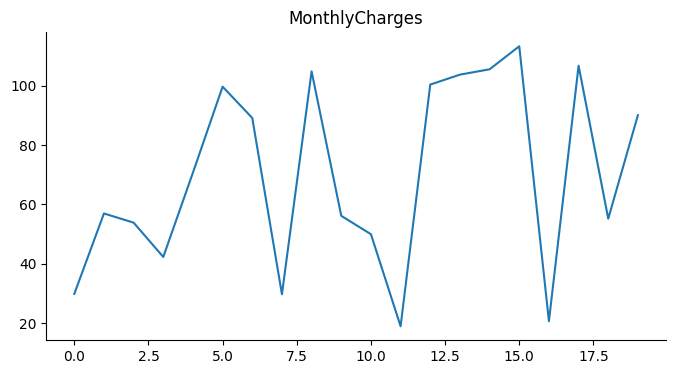

In [106]:
from matplotlib import pyplot as plt
_df_12['MonthlyCharges'].plot(kind='line', figsize=(8, 4), title='MonthlyCharges')
plt.gca().spines[['top', 'right']].set_visible(False)

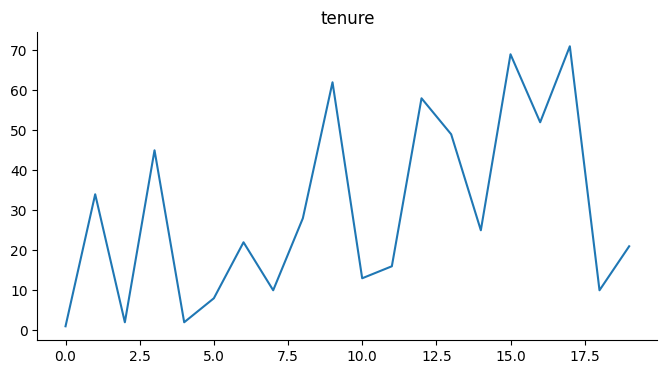

In [107]:
from matplotlib import pyplot as plt
_df_11['tenure'].plot(kind='line', figsize=(8, 4), title='tenure')
plt.gca().spines[['top', 'right']].set_visible(False)

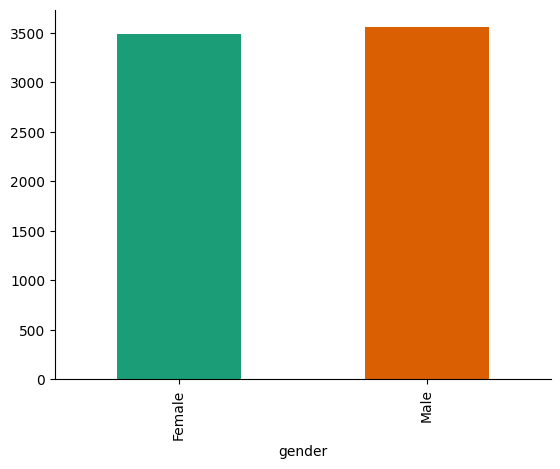

In [108]:
from matplotlib import pyplot as plt
import seaborn as sns
tel_data.groupby('gender').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [109]:
#droping customer Id as it is not neccessary
tel_data.drop('customerID',axis='columns',inplace=True)

In [110]:
tel_data['gender'].value_counts()


Male      3555
Female    3488
Name: gender, dtype: int64

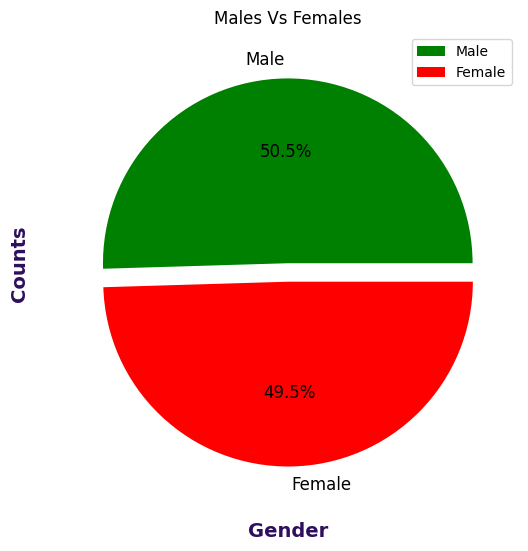

In [111]:
plt.figure(figsize = (20, 6))

counts = tel_data["gender"].value_counts()
explode = (0, 0.1)
colors=["green","red"]
counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%.1f%%')
plt.title('Males Vs Females')
plt.xlabel('Gender', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.ylabel('Counts', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [112]:
#convert the gender male to 0 and female 1
tel_data['gender']=tel_data['gender'].replace({'male': 0, 'female': 1}, inplace=True)

In [113]:
#Count of Partner
tel_data['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

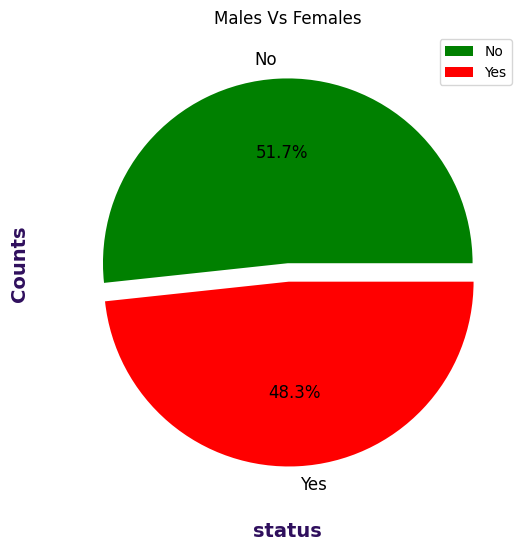

In [114]:
plt.figure(figsize = (20, 6))

counts = tel_data["Partner"].value_counts()
explode = (0, 0.1)
colors=["green","red"]
counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%.1f%%')
plt.title('Males Vs Females')
plt.xlabel('status', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.ylabel('Counts', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [115]:
#convert the partner status no to 0 and yes 1
tel_data['Partner']=tel_data['Partner'].replace({'No': 0, 'Yes': 1}, inplace=True)

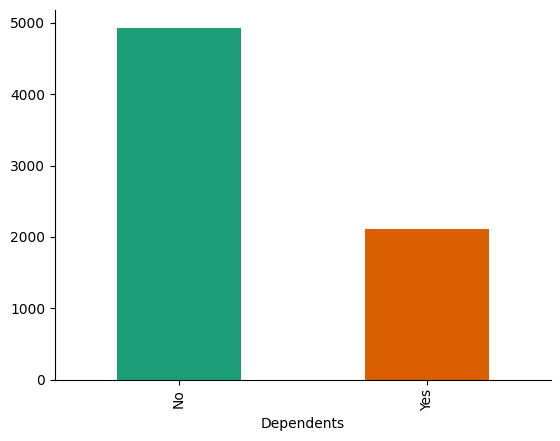

In [116]:
from matplotlib import pyplot as plt
import seaborn as sns
tel_data.groupby('Dependents').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [117]:
#convert the dependents male to 0 and female 1
tel_data['Dependents']=tel_data['Dependents'].replace({'No': 0, 'Yes': 1}, inplace=True)

In [118]:
#Phone Service
tel_data['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

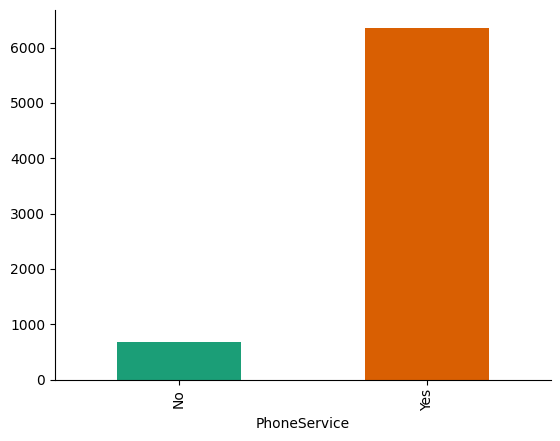

In [119]:
#visualisation of Phone Service
from matplotlib import pyplot as plt
import seaborn as sns
tel_data.groupby('PhoneService').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [120]:
#convert the gender male to 0 and female 1
tel_data['PhoneService']=tel_data['PhoneService'].replace({'No': 0, 'Yes': 1}, inplace=True)

In [121]:
#Multiple_lines
tel_data['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

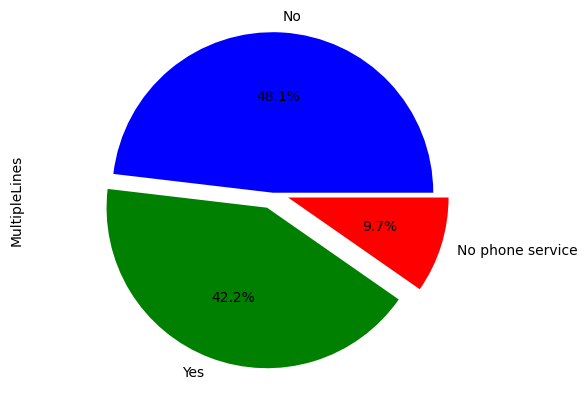

In [122]:
colors = ["blue" , "green" , "red"]
explode = (0, 0.1  , 0.1)
tel_data['MultipleLines'].value_counts().plot(kind='pie', autopct='%1.1f%%',colors=colors,explode=explode)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [123]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
tel_data.InternetService = le.fit_transform(tel_data.InternetService)
tel_data.Contract = le.fit_transform(tel_data.Contract)
tel_data.PaymentMethod = le.fit_transform(tel_data.PaymentMethod)
tel_data.	MultipleLines= le.fit_transform(tel_data.	MultipleLines)

In [125]:
tel_data.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4583,None,0,None,None,71,None,2,0,Yes,Yes,Yes,Yes,Yes,Yes,2,No,2,90.10,6310.9,No
5832,None,0,None,None,20,None,0,1,No,No,No,No,No,No,0,Yes,2,70.45,1470.95,Yes
2579,None,0,None,None,48,None,0,2,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,2,No,1,20.15,982.95,No
3395,None,0,None,None,62,None,2,1,Yes,Yes,Yes,No,No,No,0,No,0,90.70,5586.45,No
6730,None,0,None,None,15,None,0,2,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,1,No,3,19.65,332.65,No
657,None,0,None,None,45,None,0,0,Yes,Yes,Yes,No,Yes,Yes,1,No,0,78.80,3597.5,No
5367,None,0,None,None,65,None,2,0,Yes,Yes,No,Yes,Yes,Yes,2,Yes,0,82.50,5215.1,No
6750,None,0,None,None,43,None,1,0,Yes,No,Yes,No,No,No,1,Yes,1,35.20,1463.7,No
5366,None,0,None,None,66,None,0,0,Yes,No,No,No,Yes,No,2,Yes,2,59.75,3996.8,No
1041,None,0,None,None,16,None,0,2,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,1,Yes,0,19.30,360.35,No
